#  Bibliotecas e Conectando com o Google Drive

In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
!pip install --upgrade geopandas
import geopandas as gpd

     |████████████████████████████████| 1.0MB 3.0MB/s 
     |████████████████████████████████| 6.6MB 18.2MB/s 
     |████████████████████████████████| 15.4MB 212kB/s 


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Informações dos Municípios (Covid + IBGE)

## Lendo e organizando Dados

In [35]:
caminho = "/content/drive/MyDrive/UFS/Iniciação Científica/Curso de Modelagem e Visualização de Dados com Python/Dados/Municípios_12.04.2021.csv"
caminho = "/content/drive/MyDrive/VisaVi-SE/Conteúdo do Portal/Mapas com dados do Portal do estado + dados IBGE/Municípios_01.06.2021.csv"
municipios = pd.read_csv(caminho, decimal=',')

In [36]:
municipios.head()

,Local de Residência,Confirmado,Óbito,Letalidade,Incidência p/100.000 hab.,Mortalidade p/100.000 hab.
0,Amparo de São Francisco,208,3,1.4,8739.5,126.1
1,Aquidabã,2044,34,1.7,9427.6,156.8
2,Aracaju,111243,2084,1.9,16730.6,313.4
3,Arauá,1093,19,1.7,10988.2,191.0
4,Areia Branca,1743,42,2.4,6232.3,150.2


In [37]:
df_sergipe_dados_geral = pd.read_excel("/content/drive/My Drive/Google Colab/Dados dos Municípios de Sergipe.xlsx", nrows=75, skiprows=2)

In [38]:
df_sergipe_dados_geral.head()

,Município [-],Código [-],Gentílico [-],Prefeito [2017],Área Territorial - km² [2019],População estimada - pessoas [2020],Densidade demográfica - hab/km² [2010],Escolarização <span>6 a 14 anos</span> - % [2010],IDHM <span>Índice de desenvolvimento humano municipal</span> [2010],Mortalidade infantil - óbitos por mil nascidos vivos [2017],Receitas realizadas - R$ (×1000) [2017],Despesas empenhadas - R$ (×1000) [2017],PIB per capita - R$ [2017]
0,Amparo do São Francisco,2800100,amparense,FRANKLIN RAMIRES FREIRE CARDOSO,35.330,2380,64.75,97.4,0.611,25.64,1.446233e+04,1.276085e+04,11867.65
1,Aquidabã,2800209,aquidabãense,FRANCISCO FRANCIMARIO RODRIGUES DE LUCEN,359.543,21681,55.82,98.6,0.578,20.98,3.703566e+04,3.352340e+04,10025.75
2,Aracaju,2800308,aracajuano,EDVALDO NOGUEIRA FILHO,182.163,664908,3140.65,97.4,0.770,17.20,1.786682e+06,1.502596e+06,25185.55
3,Arauá,2800407,arauaense,JOSE RANULFO DOS SANTOS,198.967,9947,54.73,98.3,0.595,12.99,2.781802e+04,2.825288e+04,10444.87
4,Areia Branca,2800506,areia-branquense,ALAN ANDRELINO NUNES SANTOS,148.134,18686,114.93,98.0,0.579,7.46,4.717967e+04,4.279581e+04,10583.82


In [39]:
colunasSelecionadas = ["Município [-]", "Área Territorial - km² [2019]", "População estimada - pessoas [2020]", "Densidade demográfica - hab/km² [2010]",
                       "IDHM <span>Índice de desenvolvimento humano municipal</span> [2010]"]
df_sergipe_dados = df_sergipe_dados_geral.filter(items=colunasSelecionadas)

df_sergipe_dados["Área Territorial - km² [2019]"] = df_sergipe_dados["Área Territorial - km² [2019]"].apply(lambda x: x*1000)  # "Área Territorial - km² [2019]" tem que mutiplicar por 1000
df_sergipe_dados.head()

,Município [-],Área Territorial - km² [2019],População estimada - pessoas [2020],Densidade demográfica - hab/km² [2010],IDHM <span>Índice de desenvolvimento humano municipal</span> [2010]
0,Amparo do São Francisco,35330.0,2380,64.75,0.611
1,Aquidabã,359543.0,21681,55.82,0.578
2,Aracaju,182163.0,664908,3140.65,0.770
3,Arauá,198967.0,9947,54.73,0.595
4,Areia Branca,148134.0,18686,114.93,0.579


In [40]:
df_dados_municipios = pd.concat([municipios, df_sergipe_dados], axis=1)
df_dados_municipios.head()

,Local de Residência,Confirmado,Óbito,Letalidade,Incidência p/100.000 hab.,Mortalidade p/100.000 hab.,Município [-],Área Territorial - km² [2019],População estimada - pessoas [2020],Densidade demográfica - hab/km² [2010],IDHM <span>Índice de desenvolvimento humano municipal</span> [2010]
0,Amparo de São Francisco,208,3,1.4,8739.5,126.1,Amparo do São Francisco,35330.0,2380,64.75,0.611
1,Aquidabã,2044,34,1.7,9427.6,156.8,Aquidabã,359543.0,21681,55.82,0.578
2,Aracaju,111243,2084,1.9,16730.6,313.4,Aracaju,182163.0,664908,3140.65,0.770
3,Arauá,1093,19,1.7,10988.2,191.0,Arauá,198967.0,9947,54.73,0.595
4,Areia Branca,1743,42,2.4,6232.3,150.2,Areia Branca,148134.0,18686,114.93,0.579


In [41]:
# Pegando as cidades com mais e menos casos

df_dados_municipios_ordenado = df_dados_municipios.sort_values(by='Confirmado')
municipios_menosCasos = df_dados_municipios_ordenado.head(5)
municipios_maisCasos = df_dados_municipios_ordenado.tail(5)

## Gráficos dos Municípios

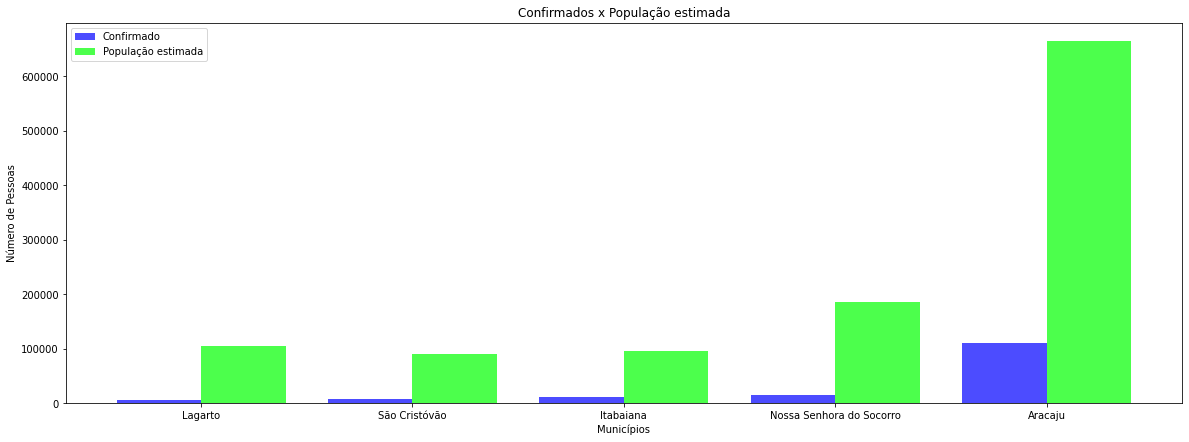

In [42]:
fig,ax = plt.subplots(figsize=(20, 7))

indice = np.arange(5)
bar_larg = 0.4
transp = 0.7

ax.bar(indice, municipios_maisCasos['Confirmado'], bar_larg, alpha=transp, color='#0000ff', label='Confirmado')
ax.bar(indice + bar_larg, municipios_maisCasos['População estimada - pessoas [2020]'], bar_larg, alpha=transp, color='#00ff00', label='População estimada')

plt.xlabel('Municípios') 
plt.ylabel('Número de Pessoas') 
plt.title('Confirmados x População estimada') 
plt.xticks(indice + (bar_larg/2), municipios_maisCasos['Local de Residência']) 
plt.legend() 
#plt.tight_layout()
plt.show()

In [43]:
# Use o index_colunas para selecionar por qual coluna do data_frame você deseja ordenar os dados
# Use o index_extremos para selecionar se você deseja observar os municípios com os 5 menores valores ou os 5 maiores

# Você pode ordenar os dados por:
#  0 - Número de Casos
#  1 - Óbito
#  2 - Incidência
#  3 - Mortalidade
#  4 - Área Territorial - km²
#  5 - População estimada
#  6 - Densidade demográfica
#  7 - IDHM
index_colunas = 0

#  0 - Menores
#  1 - Maiores
index_extremos = 1

colunas = ["Confirmado", "Óbito", " Incidência p/100.000 hab.", "Mortalidade p/100.000 hab.", "Área Territorial - km² [2019]", "População estimada - pessoas [2020]", "Densidade demográfica - hab/km² [2010]",
                       "IDHM <span>Índice de desenvolvimento humano municipal</span> [2010]"]

string_colunas = ["Número de Casos", "Número de Óbitos", "Índice de Incidência", "Índice de Mortalidade", "Tamanho de Área Territorial", "Número de População Estimada",
                  "Número de Densidade demográfica", "IDHM"]

coluna_selecionada = colunas[index_colunas]
df_dados_municipios_ordenado = df_dados_municipios.sort_values(by=coluna_selecionada)
municipios_menores = df_dados_municipios_ordenado.head(5)
municipios_maiores = df_dados_municipios_ordenado.tail(5)
extremos = [municipios_menores, municipios_maiores]
string_extremos = ["MENOR", "MAIOR"]


In [44]:
# https://seaborn.pydata.org/tutorial/color_palettes.html
palette1 = sns.color_palette("Reds", 5)
palette2 = sns.color_palette("Wistia", 5)
palette3 = sns.color_palette("Greys", 5)
palette4 = sns.color_palette("Greens", 5)
palette5 = sns.color_palette("Purples", 5)
palette6 = sns.color_palette("Blues", 5)

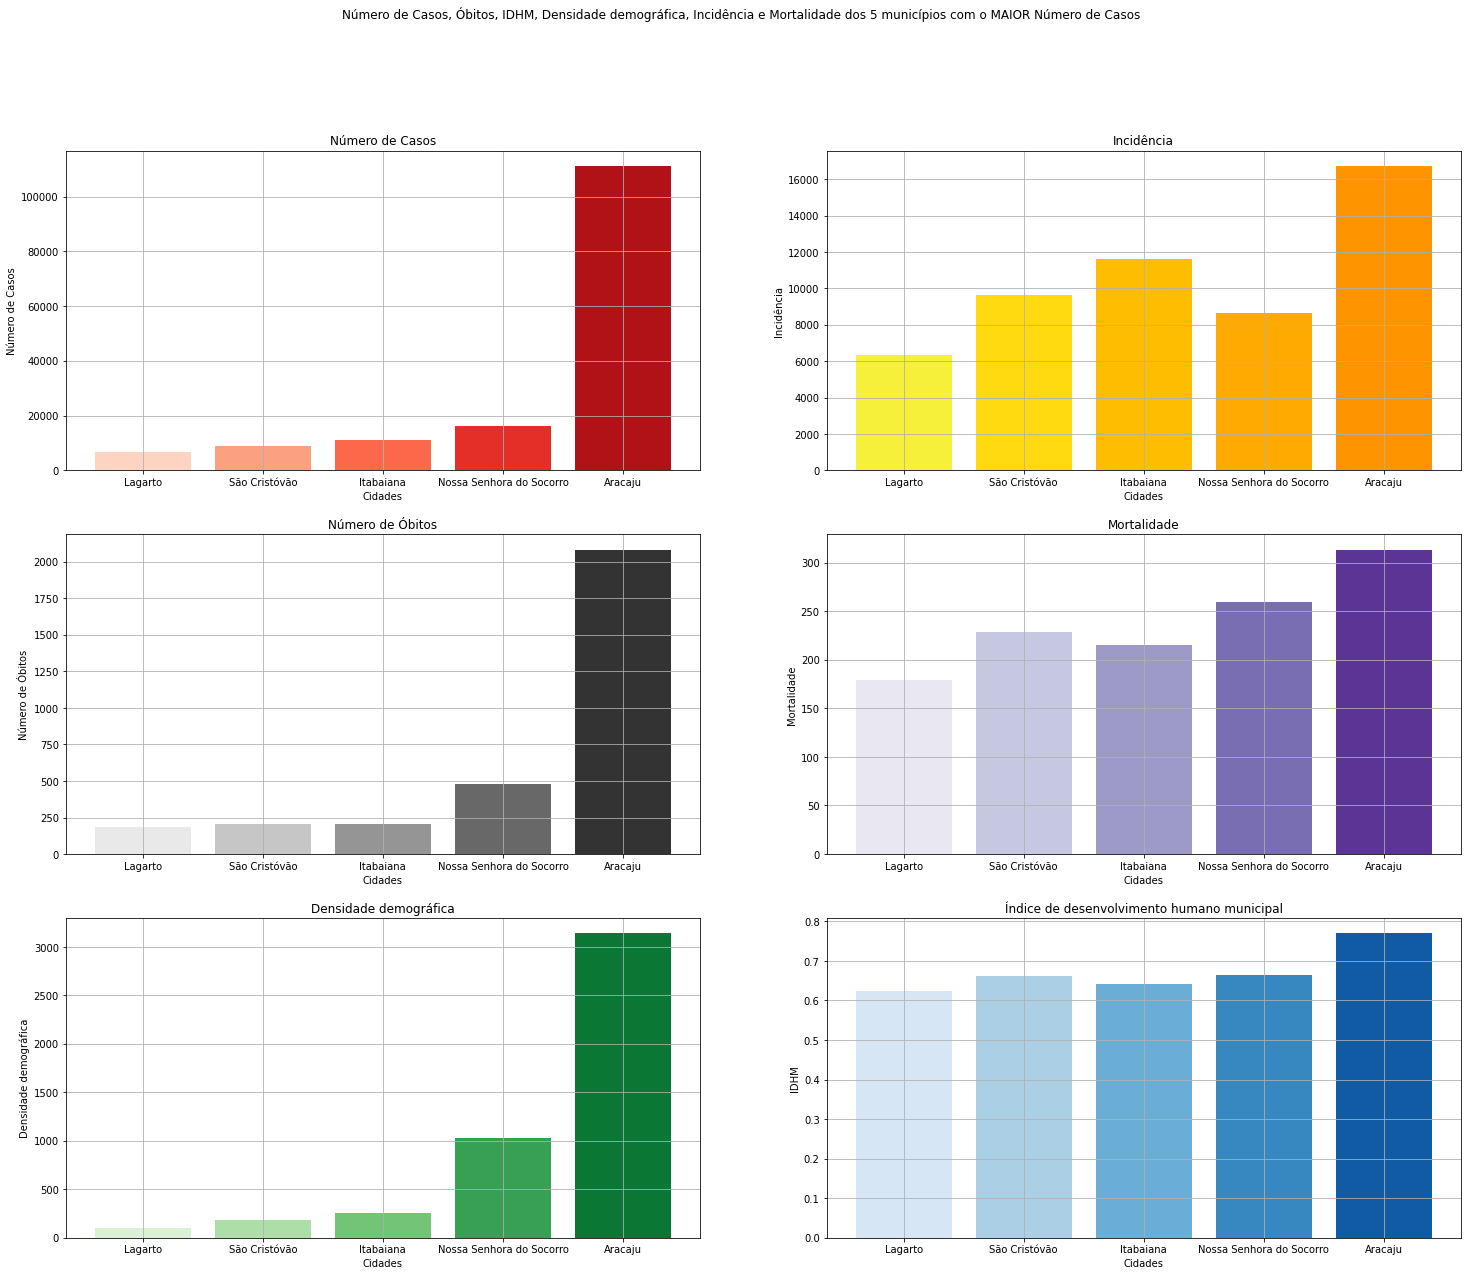

In [45]:
fig,axes = plt.subplots(3, 2, figsize=(25, 20))

axes[0,0].bar(extremos[index_extremos]['Local de Residência'], extremos[index_extremos]['Confirmado'], color=palette1)
axes[0,0].set_ylabel('Número de Casos')
axes[0,0].set_xlabel('Cidades')
axes[0,0].grid(True)
axes[0,0].set_title('Número de Casos')

axes[0,1].bar(extremos[index_extremos]['Local de Residência'], extremos[index_extremos][' Incidência p/100.000 hab.'], color=palette2)
axes[0,1].set_ylabel('Incidência')
axes[0,1].set_xlabel('Cidades')
axes[0,1].grid(True)
axes[0,1].set_title('Incidência')

axes[1,0].bar(extremos[index_extremos]['Local de Residência'], extremos[index_extremos]['Óbito'], color=palette3)
axes[1,0].set_ylabel('Número de Óbitos')
axes[1,0].set_xlabel('Cidades')
axes[1,0].grid(True)
axes[1,0].set_title('Número de Óbitos')

axes[1,1].bar(extremos[index_extremos]['Local de Residência'], extremos[index_extremos]['Mortalidade p/100.000 hab.'], color=palette5)
axes[1,1].set_ylabel('Mortalidade')
axes[1,1].set_xlabel('Cidades')
axes[1,1].grid(True)
axes[1,1].set_title('Mortalidade')

axes[2,0].bar(extremos[index_extremos]['Local de Residência'], extremos[index_extremos]['Densidade demográfica - hab/km² [2010]'], color=palette4)
axes[2,0].set_ylabel('Densidade demográfica')
axes[2,0].set_xlabel('Cidades')
axes[2,0].grid(True)
axes[2,0].set_title('Densidade demográfica')

axes[2,1].bar(extremos[index_extremos]['Local de Residência'], extremos[index_extremos]['IDHM <span>Índice de desenvolvimento humano municipal</span> [2010]'], color=palette6)
axes[2,1].set_ylabel('IDHM')
axes[2,1].set_xlabel('Cidades')
axes[2,1].grid(True)
axes[2,1].set_title('Índice de desenvolvimento humano municipal')

titulo = "Número de Casos, Óbitos, IDHM, Densidade demográfica, Incidência e Mortalidade dos 5 municípios com o " + string_extremos[index_extremos] + " " + string_colunas[index_colunas]
fig.suptitle(titulo)
plt.show()

## Mapas

In [46]:
df_sergipe_mapa = gpd.read_file("/content/drive/My Drive/Google Colab/Mapa Sergipe/28MUE250GC_SIR.shp")
df_sergipe_mapa.head()

,NM_MUNICIP,CD_GEOCMU,geometry
0,AMPARO DE SÃO FRANCISCO,2800100,"POLYGON ((-36.92631 -10.12655, -36.92575 -10.1..."
1,AQUIDABÃ,2800209,"POLYGON ((-37.05740 -10.18109, -37.01690 -10.1..."
2,ARACAJU,2800308,"POLYGON ((-37.03528 -10.87519, -37.03643 -10.8..."
3,ARAUÁ,2800407,"MULTIPOLYGON (((-37.63498 -11.34699, -37.63843..."
4,AREIA BRANCA,2800506,"POLYGON ((-37.28128 -10.72058, -37.28128 -10.7..."


In [47]:
formas_municipios = df_sergipe_mapa["geometry"]
result = pd.concat([df_dados_municipios, formas_municipios], axis=1)

In [48]:
result = gpd.GeoDataFrame(result, geometry='geometry')
result.head()

,Local de Residência,Confirmado,Óbito,Letalidade,Incidência p/100.000 hab.,Mortalidade p/100.000 hab.,Município [-],Área Territorial - km² [2019],População estimada - pessoas [2020],Densidade demográfica - hab/km² [2010],IDHM <span>Índice de desenvolvimento humano municipal</span> [2010],geometry
0,Amparo de São Francisco,208,3,1.4,8739.5,126.1,Amparo do São Francisco,35330.0,2380,64.75,0.611,"POLYGON ((-36.92631 -10.12655, -36.92575 -10.1..."
1,Aquidabã,2044,34,1.7,9427.6,156.8,Aquidabã,359543.0,21681,55.82,0.578,"POLYGON ((-37.05740 -10.18109, -37.01690 -10.1..."
2,Aracaju,111243,2084,1.9,16730.6,313.4,Aracaju,182163.0,664908,3140.65,0.770,"POLYGON ((-37.03528 -10.87519, -37.03643 -10.8..."
3,Arauá,1093,19,1.7,10988.2,191.0,Arauá,198967.0,9947,54.73,0.595,"MULTIPOLYGON (((-37.63498 -11.34699, -37.63843..."
4,Areia Branca,1743,42,2.4,6232.3,150.2,Areia Branca,148134.0,18686,114.93,0.579,"POLYGON ((-37.28128 -10.72058, -37.28128 -10.7..."


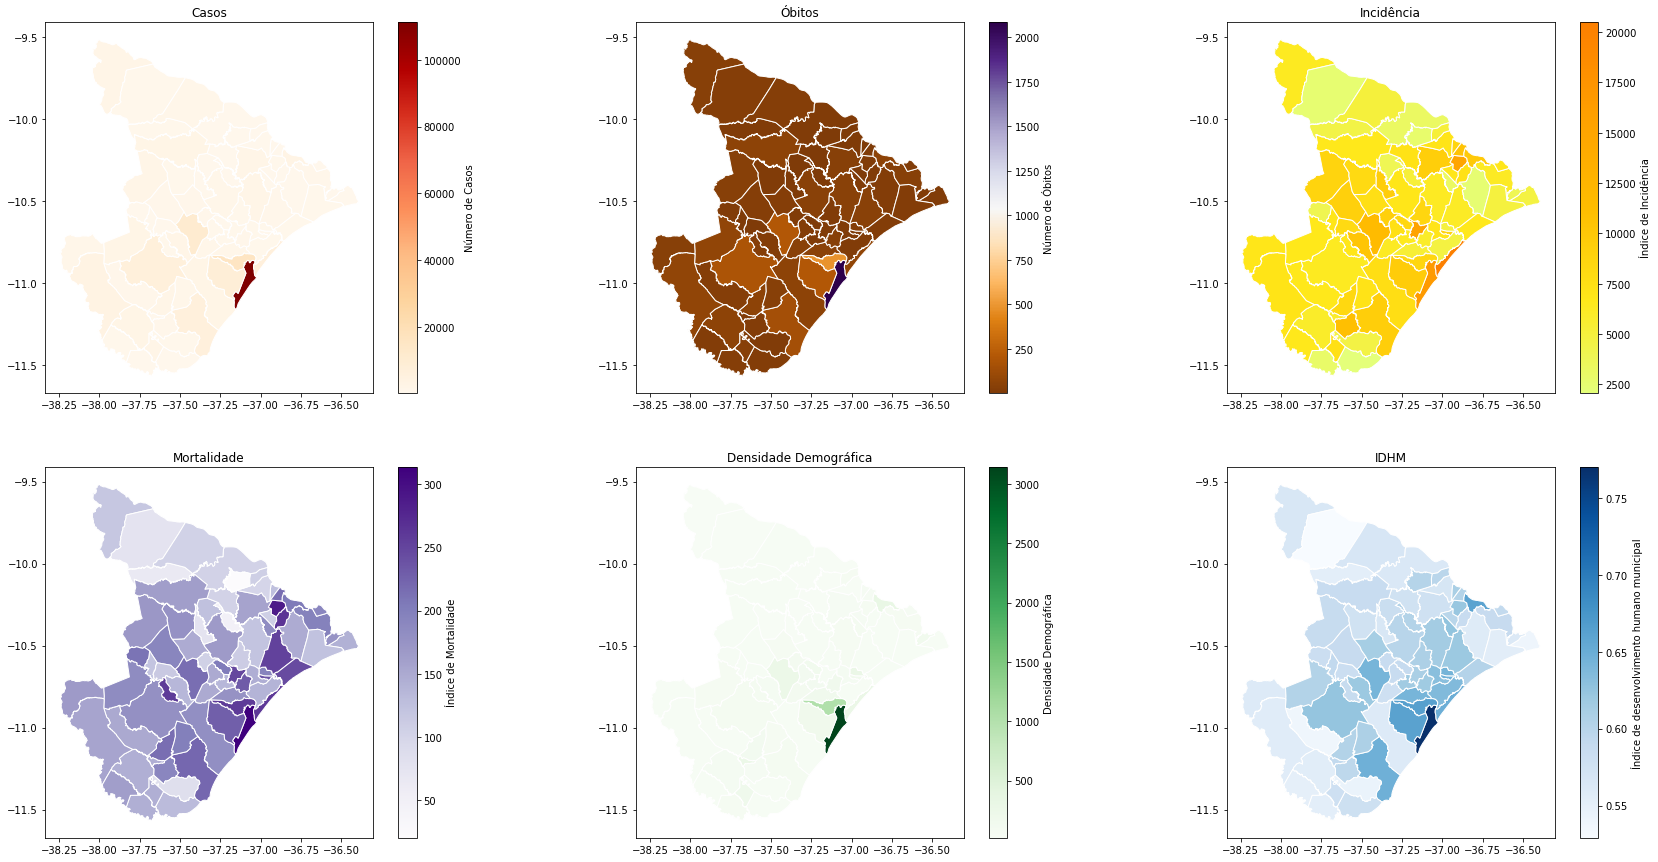

In [49]:
fig, ax = plt.subplots(2, 3, figsize=(30, 15))

result.plot(column='Confirmado', ax=ax[0,0], legend=True, cmap='OrRd', edgecolor='white', legend_kwds={'label': "Número de Casos",'orientation': "vertical"})
ax[0,0].set_title('Casos')
result.plot(column='Óbito', ax=ax[0,1], legend=True, cmap='PuOr', edgecolor='white', legend_kwds={'label': "Número de Óbitos",'orientation': "vertical"})
ax[0,1].set_title('Óbitos')
result.plot(column=' Incidência p/100.000 hab.', ax=ax[0,2], legend=True, cmap='Wistia', edgecolor='white', legend_kwds={'label': "Índice de Incidência",'orientation': "vertical"})
ax[0,2].set_title('Incidência')
result.plot(column='Mortalidade p/100.000 hab.', ax=ax[1,0], legend=True, cmap='Purples', edgecolor='white', legend_kwds={'label': "Índice de Mortalidade",'orientation': "vertical"})
ax[1,0].set_title('Mortalidade')
result.plot(column='Densidade demográfica - hab/km² [2010]', ax=ax[1,1], legend=True, cmap='Greens', edgecolor='white', legend_kwds={'label': "Densidade Demográfica",'orientation': "vertical"})
ax[1,1].set_title('Densidade Demográfica')
result.plot(column='IDHM <span>Índice de desenvolvimento humano municipal</span> [2010]', ax=ax[1,2], legend=True, cmap='Blues', edgecolor='white',
            legend_kwds={'label': "Índice de desenvolvimento humano municipal",'orientation': "vertical"})
ax[1,2].set_title('IDHM')
plt.show()

# Gráficos Comparando Um Município Específico com a Média e Valores Mínimo e Máximo de: Casos, Óbitos, Letalidade, Incidência e Mortalidade.

## Lendo e organizando os dados

In [55]:
caminho = "/content/drive/My Drive/Google Colab/Municípios_17.08.2020.csv"
caminho = "/content/drive/MyDrive/VisaVi-SE/Conteúdo do Portal/Mapas com dados do Portal do estado + dados IBGE/Municípios_01.06.2021.csv"
municipios = pd.read_csv(caminho, decimal=',')
municipios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Local de Residência         75 non-null     object 
 1   Confirmado                  75 non-null     int64  
 2   Óbito                       75 non-null     int64  
 3   Letalidade                  75 non-null     float64
 4    Incidência p/100.000 hab.  75 non-null     float64
 5   Mortalidade p/100.000 hab.  75 non-null     float64
dtypes: float64(3), int64(2), object(1)
memory usage: 3.6+ KB


In [56]:
municipios.head()

,Local de Residência,Confirmado,Óbito,Letalidade,Incidência p/100.000 hab.,Mortalidade p/100.000 hab.
0,Amparo de São Francisco,208,3,1.4,8739.5,126.1
1,Aquidabã,2044,34,1.7,9427.6,156.8
2,Aracaju,111243,2084,1.9,16730.6,313.4
3,Arauá,1093,19,1.7,10988.2,191.0
4,Areia Branca,1743,42,2.4,6232.3,150.2


In [57]:
municipios.describe()

,Confirmado,Óbito,Letalidade,Incidência p/100.000 hab.,Mortalidade p/100.000 hab.
count,75.000000,75.000000,75.000000,75.000000,75.000000
mean,3177.013333,68.186667,2.517333,7280.760000,165.114667
std,12905.423077,245.103822,1.146484,3167.796086,57.771527
min,136.000000,1.000000,0.700000,2071.700000,20.500000
25%,387.000000,12.000000,1.900000,5338.100000,124.400000
50%,891.000000,23.000000,2.300000,6846.000000,156.800000
75%,1906.000000,41.000000,2.950000,8633.850000,201.850000
max,111243.000000,2084.000000,6.400000,20478.500000,313.400000


## Seleciona o município e monta os gráficos

In [58]:
# Preparo as listas que serão utilizadas para fazer o conjunto de gráficos

municipio_selecionado = "Aquidabã"  # Selecione um município
lista_valores_geral_y = []
lista_cidades_geral_x = []

for coluna in ['Confirmado', 'Óbito', 'Letalidade', ' Incidência p/100.000 hab.', 'Mortalidade p/100.000 hab.']: # Para cada coluna
  menor = municipios[coluna].min()  
  media = municipios[coluna].mean() # Eu pego a media, o menor e maior valor
  maior = municipios[coluna].max()
  
  valor_municipio_selecionado = municipios.loc[municipios["Local de Residência"] == municipio_selecionado][coluna]  # Pego o valor do municipio selecionado na coluna atual
  valor_municipio_selecionado = int(valor_municipio_selecionado) # Continha outras informações do DF

  lista_valores_y = [menor, media, valor_municipio_selecionado, maior]
  lista_valores_y.sort()
  lista_valores_y = tuple(lista_valores_y)
  lista_valores_geral_y.append(lista_valores_y) # Armazeno a tupla com os valores pro eixo y referentes a coluna atual na lista de valores gerais

  lista_cidades_x = []  # Armazena os nomes dos: município com menor valor, municipio selecionado, Media, município com maior valor
  # Uso o indice para acessar o nome dos municipios  referentes aos valores: menor, maior
  indice = list(municipios[coluna]).index(menor)
  lista_cidades_x.append(municipios["Local de Residência"][indice] + " (Valor Mínimo)")

  if media > valor_municipio_selecionado:    # Organizo em ordem crescente, comparando se o valor do municipio selecionado é maior ou menor que a media
    lista_cidades_x.append(municipio_selecionado)
    lista_cidades_x.append("Média")
  else:
    lista_cidades_x.append("Média")
    lista_cidades_x.append(municipio_selecionado)

  indice = list(municipios[coluna]).index(maior)
  lista_cidades_x.append(municipios["Local de Residência"][indice] + " (Valor Máximo)")

  lista_cidades_x = tuple(lista_cidades_x)
  lista_cidades_geral_x.append(lista_cidades_x) # Armazeno a tupla com os nomes dos municípios na lista de valores gerais


In [59]:
palette1 = sns.color_palette("Reds", 4)
palette2 = sns.color_palette("Greys", 4)
palette3 = sns.color_palette("Greens", 4)
palette4 = sns.color_palette("Wistia", 4)
palette5 = sns.color_palette("Purples", 4)
palette6 = sns.color_palette("Blues", 4)

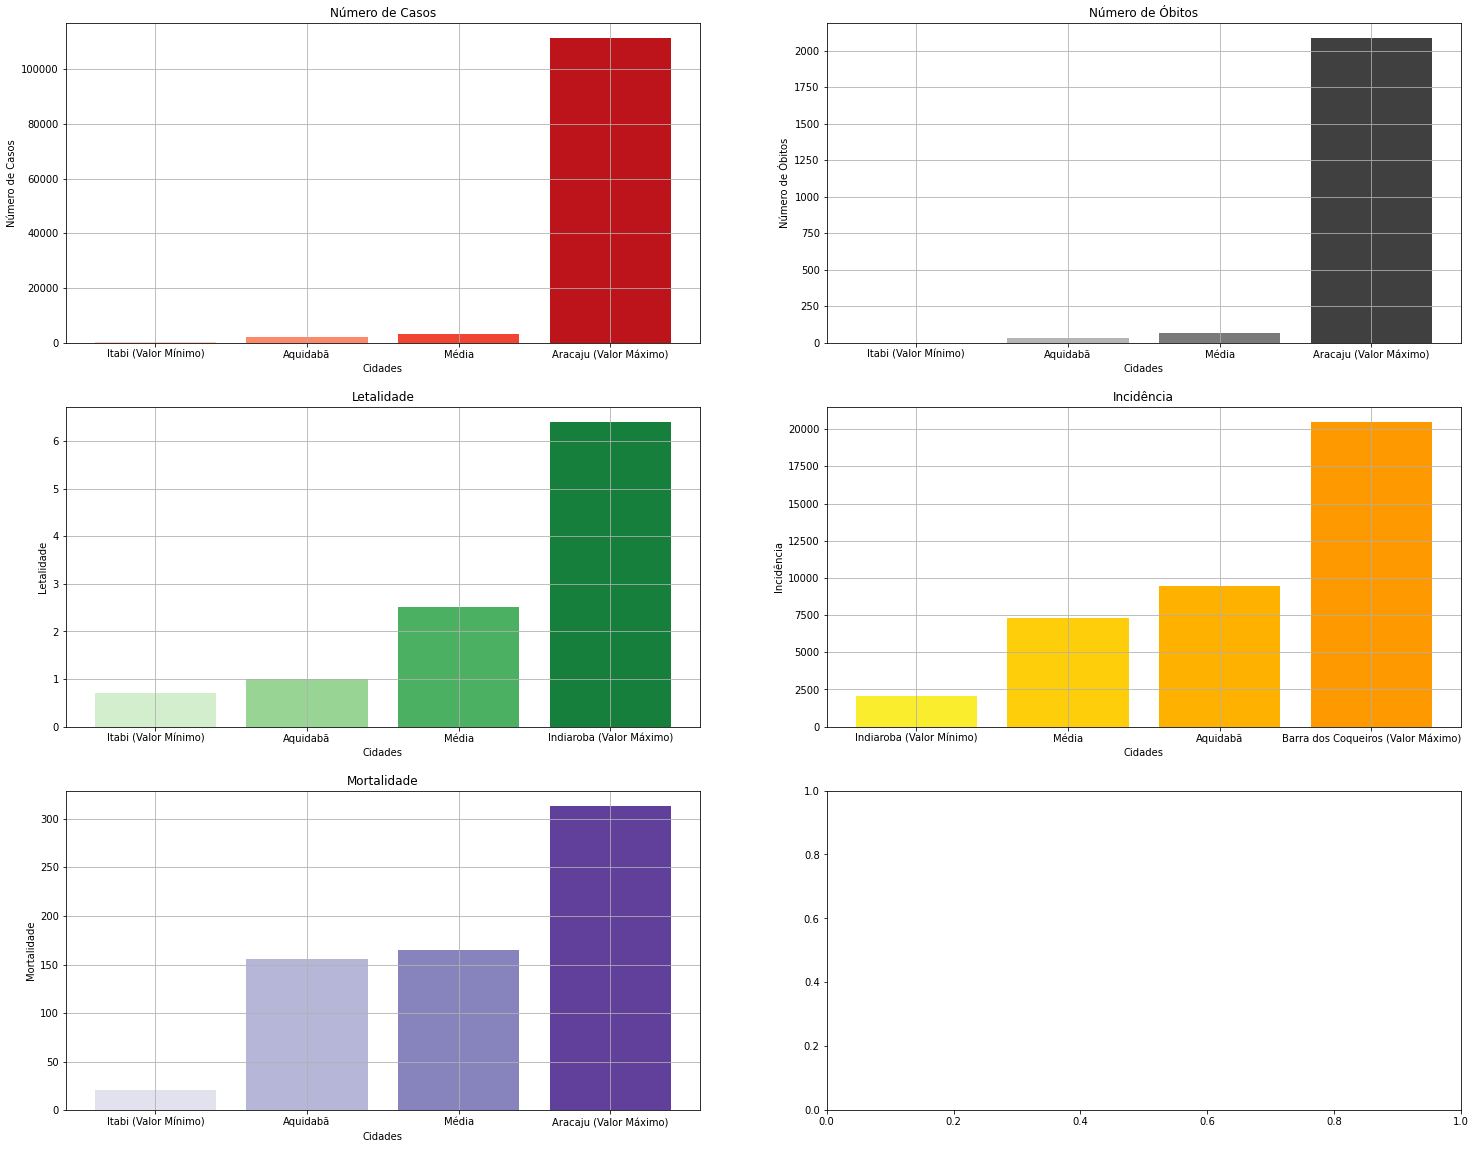

In [60]:
# Desenha o conjunto de gráficos

fig,axes = plt.subplots(3, 2, figsize=(25, 20))

axes[0,0].bar(lista_cidades_geral_x[0],lista_valores_geral_y[0], color=palette1)
axes[0,0].set_ylabel('Número de Casos')
axes[0,0].set_xlabel('Cidades')
axes[0,0].grid(True)
axes[0,0].set_title('Número de Casos')

axes[0,1].bar(lista_cidades_geral_x[1], lista_valores_geral_y[1], color=palette2)
axes[0,1].set_ylabel('Número de Óbitos')
axes[0,1].set_xlabel('Cidades')
axes[0,1].grid(True)
axes[0,1].set_title('Número de Óbitos')

axes[1,0].bar(lista_cidades_geral_x[2], lista_valores_geral_y[2], color=palette3)
axes[1,0].set_ylabel('Letalidade')
axes[1,0].set_xlabel('Cidades')
axes[1,0].grid(True)
axes[1,0].set_title('Letalidade')

axes[1,1].bar(lista_cidades_geral_x[3], lista_valores_geral_y[3], color=palette4)
axes[1,1].set_ylabel('Incidência')
axes[1,1].set_xlabel('Cidades')
axes[1,1].grid(True)
axes[1,1].set_title('Incidência')

axes[2,0].bar(lista_cidades_geral_x[4], lista_valores_geral_y[4], color=palette5)
axes[2,0].set_ylabel('Mortalidade') 
axes[2,0].set_xlabel('Cidades')
axes[2,0].grid(True)
axes[2,0].set_title('Mortalidade')

plt.show()